<a href="https://colab.research.google.com/github/hammaad2002/PSL_Recognition/blob/main/PSL_(Version_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install mediapipe

In [ ]:
from PSL_Pipeline import DataPipeline
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import os
import requests
from bs4 import BeautifulSoup
import zipfile
import random
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42) # set the random seed to 42
random.seed(42)

In [ ]:
# URL of the website to scrape
url = "https://www.mediafire.com/file/nfwsrnpsyqjon46/PictureAlphabetsUpdatedV3.0.zip/file"

# File path to save the downloaded file
download_path = "/content/PictureAlphabetsUpdatedV3.0.zip"

# Directory path to extract the contents of the zip file
extract_dir = "/content/dataset/"

# Send a GET request to the website
response = requests.get(url)

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")

# Find the <a> tag with the specified class
download_link = soup.find("a", class_="input popsok")

# Extract the value of the 'href' attribute
download_url = download_link["href"]

# Send a GET request to download the file
response = requests.get(download_url)

# Save the file to the specified path
with open(download_path, "wb") as file:
    file.write(response.content)

# Extract the contents of the zip file
with zipfile.ZipFile(download_path, "r") as zip_ref:
    zip_ref.extractall(extract_dir)

# Remove the downloaded zip file
os.remove(download_path)

print("File downloaded and extracted successfully.")

File downloaded and extracted successfully.


In [ ]:
files = os.listdir('/content/dataset/Picture Alphabets/')
classes = [i.split()[0] for i in files]
print('Total classes or alphabets:', len(classes))
print('Name of all classes are:')
[print(i) for i in classes][-1] # -1 because it was printing [none, none, none, ...]

Total classes or alphabets: 38
Name of all classes are:
Kaaf
Aeein
Gaaf
Khayy
Laam
Zhuaad
Sayy
Sheen
Fayy
Seen
Bayy
Do-chashmi
Gho-eein
Jeem
Hamza
Dal
Qaaf
Noon
Chayy
Tayy
Wow
Choti-yay
Rayy
Ghaeein
Zhe
To-eein
Alif
Bari-yay
Rhayy
Choti-hay
Tee
Zayy
Suaad
Zaal
Daal
Hayy
Payy
Meem


In [ ]:
#encoding classes by creating a dictionary
encoded_classes = {}
for i, data in enumerate(classes):
    encoded_classes[data] = i
encoded_classes

{'Kaaf': 0,
 'Aeein': 1,
 'Gaaf': 2,
 'Khayy': 3,
 'Laam': 4,
 'Zhuaad': 5,
 'Sayy': 6,
 'Sheen': 7,
 'Fayy': 8,
 'Seen': 9,
 'Bayy': 10,
 'Do-chashmi': 11,
 'Gho-eein': 12,
 'Jeem': 13,
 'Hamza': 14,
 'Dal': 15,
 'Qaaf': 16,
 'Noon': 17,
 'Chayy': 18,
 'Tayy': 19,
 'Wow': 20,
 'Choti-yay': 21,
 'Rayy': 22,
 'Ghaeein': 23,
 'Zhe': 24,
 'To-eein': 25,
 'Alif': 26,
 'Bari-yay': 27,
 'Rhayy': 28,
 'Choti-hay': 29,
 'Tee': 30,
 'Zayy': 31,
 'Suaad': 32,
 'Zaal': 33,
 'Daal': 34,
 'Hayy': 35,
 'Payy': 36,
 'Meem': 37}

In [ ]:
data = DataPipeline(640, 480)
dataset = []
for i in tqdm(range(len(files))):
    for folder in files:
        class_features = []
        if folder.split()[0] == classes[i]:
            path = '/content/dataset/Picture Alphabets/' + folder
            pictures = os.listdir(path)
            for picture in pictures:
                new_path = path + '/' + picture
                image = cv2.imread(new_path)
                output = data.apply_landmarks(image.copy(), draw=True)
                if output == 0:
                    continue
                else:
                    image_marked, pointsX, pointsY = output
                final_image, meta_data = data.hand_cropper(image_marked, pointsX, pointsY)
                x_points, y_points = data.points_calculator(final_image) # image with marked landmarks
                if len(x_points) != 21:
                    x_points, y_points = data.points_approximator(image, meta_data, pointsX, pointsY)
                features = x_points + y_points
                label = encoded_classes[folder.split()[0]]
                total_row = features + [label]
                dataset.append(total_row)

  0%|          | 0/38 [00:00<?, ?it/s]

In [ ]:
df = pd.DataFrame(dataset)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,304.000000,266.000000,384.000000,400.000000,360.000000,268.000000,388.000000,375.000000,419.000000,346.000000,...,236.000000,234.000000,186.000000,165.000000,162.000000,120.000000,116.000000,81.000000,74.000000,0
1,353.000000,259.000000,415.000000,379.000000,431.000000,396.000000,463.000000,227.000000,458.000000,402.000000,...,257.000000,234.000000,188.000000,165.000000,164.000000,106.000000,104.000000,62.000000,59.000000,0
2,343.000000,407.000000,260.000000,358.000000,431.000000,389.000000,457.000000,231.000000,462.000000,397.000000,...,256.000000,225.000000,179.000000,176.000000,168.000000,114.000000,110.000000,73.000000,62.000000,0
3,409.393756,393.885653,370.544479,362.684634,360.567477,330.212461,313.296685,303.687411,295.117969,353.987647,...,140.502577,257.721069,231.160956,269.157802,288.966852,259.425884,245.425889,276.880491,297.207169,0
4,374.000000,289.000000,429.000000,378.000000,440.000000,392.000000,245.000000,473.000000,461.000000,412.000000,...,258.000000,227.000000,173.000000,165.000000,164.000000,106.000000,104.000000,62.000000,57.000000,0


# Model Training

# ML MODEL PART I

In [ ]:
%%capture
!pip install catboost

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
df.shape # dataset shape

(950, 43)

In [ ]:
target = np.array(df.iloc[:,-1])
target.shape

(950,)

In [ ]:
features = np.array(df.iloc[:,:-1])
features.shape

(950, 42)

In [ ]:
%%capture
# Load your dataset (replace this with your data)
X = features
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Linear Kernel: This is the simplest kernel function and is used when the data is linearly separable. The syntax for the argument is kernel='linear' 13.
#Polynomial Kernel: This kernel function is used when the data is not linearly separable. The syntax for the argument is kernel='poly' 1.
#Radial Basis Function (RBF) Kernel: This kernel function is used when the data is not linearly separable in a higher-dimensional space. The syntax for the argument is kernel='rbf' 124.
#Sigmoid Kernel: This kernel function is used when the data is not linearly separable and the data points are not in a high-dimensional space. The syntax for the argument is kernel='sigmoid' 1.

# Define a list of classifiers
classifiers = [
    SVC(kernel='linear', random_state=42),
    SVC(kernel='poly', random_state=42),
    SVC(kernel='rbf', random_state=42),
    SVC(kernel='sigmoid', random_state=42),
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    lgb.LGBMClassifier(random_state=42),
    cb.CatBoostClassifier(random_state=42),
    xgb.XGBClassifier(random_state=42)
]

# Define a list of classifiers
classifiers_list = [
    'SVC Linear',
    'SVC Poly',
    'SVC RBF',
    'SVC Sigmoid',
    'Logistic Regression',
    'Decision Tree Classifier',
    'Random Forest Classifier',
    'AdaBoost Classifier',
    'LGBM Classifier',
    'CatBoost Classifier',
    'XGB Classifier'
]

# Train and evaluate each classifier
accuracy_list = []
for clf in classifiers:
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    accuracy_list.append(accuracy)

Learning rate set to 0.078027
0:	learn: 3.5661938	total: 501ms	remaining: 8m 20s
1:	learn: 3.4756540	total: 1.01s	remaining: 8m 24s
2:	learn: 3.3852972	total: 1.49s	remaining: 8m 15s
3:	learn: 3.3068808	total: 1.95s	remaining: 8m 6s
4:	learn: 3.2209557	total: 2.5s	remaining: 8m 17s
5:	learn: 3.1576203	total: 3s	remaining: 8m 16s
6:	learn: 3.1189699	total: 3.67s	remaining: 8m 40s
7:	learn: 3.0575190	total: 4.52s	remaining: 9m 20s
8:	learn: 2.9909881	total: 5.25s	remaining: 9m 38s
9:	learn: 2.9373003	total: 6s	remaining: 9m 54s
10:	learn: 2.8776431	total: 6.73s	remaining: 10m 4s
11:	learn: 2.8214956	total: 7.12s	remaining: 9m 45s
12:	learn: 2.7651932	total: 7.54s	remaining: 9m 32s
13:	learn: 2.7168098	total: 7.99s	remaining: 9m 22s
14:	learn: 2.6609584	total: 8.23s	remaining: 9m
15:	learn: 2.6025853	total: 8.46s	remaining: 8m 40s
16:	learn: 2.5494927	total: 8.69s	remaining: 8m 22s
17:	learn: 2.5138736	total: 8.93s	remaining: 8m 7s
18:	learn: 2.4562314	total: 9.15s	remaining: 7m 52s
19:	l

In [ ]:
for i in range(len(accuracy_list)):
    print(f"{classifiers_list[i]} model's accuracy is {accuracy_list[i]}.")

SVC Linear model's accuracy is 0.6736842105263158.
SVC Poly model's accuracy is 0.14210526315789473.
SVC RBF model's accuracy is 0.1.
SVC Sigmoid model's accuracy is 0.031578947368421054.
Logistic Regression model's accuracy is 0.5473684210526316.
Decision Tree Classifier model's accuracy is 0.5894736842105263.
Random Forest Classifier model's accuracy is 0.7736842105263158.
AdaBoost Classifier model's accuracy is 0.021052631578947368.
LGBM Classifier model's accuracy is 0.7631578947368421.
CatBoost Classifier model's accuracy is 0.7684210526315789.
XGB Classifier model's accuracy is 0.7052631578947368.


In [ ]:
print(f'Best performing model is {classifiers_list[accuracy_list.index(max(accuracy_list))]} with an accuracy of {max(accuracy_list)}')

Best performing model is Random Forest Classifier with an accuracy of 0.7736842105263158


Random Forest Parameters:


```
n_estimators=100
criterion='gini'
max_depth=None
min_samples_split=2
min_samples_leaf=1
min_weight_fraction_leaf=0.0
max_features='sqrt'
max_leaf_nodes=None
min_impurity_decrease=0.0
bootstrap=True
oob_score=False
n_jobs=None
random_state=None
verbose=0
warm_start=False
class_weight=None
ccp_alpha=0.0
max_samples=None
```



In [ ]:
# Define parameter grid to search over
grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3],
    'max_leaf_nodes': [1, 2, 3, 4, 5]
}

Utilizing Grid Search

In [ ]:
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_
print('Best parameters are:')
print(best_params_grid)
print('Best score is ', best_score_grid)

Utilizing Random Search

In [ ]:
model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=model, param_distributions=grid, cv=3, verbose=2, n_jobs=-1, random_state=np.random.seed(42))
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_leaf_nodes': [1, 2, 3, 4, 5],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2, 0.3],
                                        'n_estimators': [100, 200, 300]},
                   verbose=2)

In [ ]:
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_
print('Best parameters are:')
print(best_params_random)
print('Best score is ', best_score_random)

Best parameters are:
{'n_estimators': 300, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_leaf_nodes': 5}
Best score is  0.3775533493095972


In [ ]:
model = cb.CatBoostClassifier(**best_params_random, iterations = 2000, random_state=42, task_type='GPU')

In [ ]:
model.fit(X_train, y_train,
          eval_set = [(X_test, y_test)],
          verbose = True)

# Accuracy
model.score(X_test, y_test)

0:	learn: 3.5562667	test: 3.5797084	best: 3.5797084 (0)	total: 101ms	remaining: 3m 21s
1:	learn: 3.4794026	test: 3.5203247	best: 3.5203247 (1)	total: 186ms	remaining: 3m 6s
2:	learn: 3.4113185	test: 3.4704024	best: 3.4704024 (2)	total: 242ms	remaining: 2m 41s
3:	learn: 3.3346211	test: 3.4166028	best: 3.4166028 (3)	total: 305ms	remaining: 2m 32s
4:	learn: 3.2830688	test: 3.3767257	best: 3.3767257 (4)	total: 364ms	remaining: 2m 25s
5:	learn: 3.2285400	test: 3.3373490	best: 3.3373490 (5)	total: 421ms	remaining: 2m 20s
6:	learn: 3.1791167	test: 3.3004626	best: 3.3004626 (6)	total: 463ms	remaining: 2m 11s
7:	learn: 3.1093242	test: 3.2461448	best: 3.2461448 (7)	total: 519ms	remaining: 2m 9s
8:	learn: 3.0499839	test: 3.2089982	best: 3.2089982 (8)	total: 565ms	remaining: 2m 5s
9:	learn: 2.9998545	test: 3.1699289	best: 3.1699289 (9)	total: 607ms	remaining: 2m
10:	learn: 2.9462165	test: 3.1410850	best: 3.1410850 (10)	total: 655ms	remaining: 1m 58s
11:	learn: 2.8919286	test: 3.1044283	best: 3.104

0.7789473684210526

In [ ]:
import pickle

# Assuming you have a trained model object called 'model'
# Save the model to a file called 'model.pkl'
pickle.dump(model, open('89.9model.pkl', 'wb'))

# DL MODEL PART II

Machine Learning approach's accuracy is 77.8 %



```
Use the Keras backend function clear_session(). This function clears the Keras session and releases all the resources3.
Use del model to immediately remove the model variable from memory4.
Use K.get_session().close() to close the current Keras session6.
Use gc.collect() to force garbage collection of non-reference memory4.
Use numba.cuda.close() to flush the GPU memory, but this will not allow the GPU to be used again2.
```



In [ ]:
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split

**Data Preparation for the DL models**

In [ ]:
keras_X = []
keras_Y = []

In [ ]:
data = DataPipeline(224, 224)
for i in tqdm(range(len(files))):
    for folder in files:
        if folder.split()[0] == classes[i]:
            path = '/content/dataset/Picture Alphabets/' + folder
            pictures = os.listdir(path)
            for picture in pictures:
                new_path = path + '/' + picture
                image = cv2.imread(new_path)
                output = data.apply_landmarks(image.copy(), draw=False)
                if output == 0:
                    continue
                else:
                    image_marked, pointsX, pointsY = output
                final_image, meta_data = data.hand_cropper(image_marked, pointsX, pointsY)
                keras_X.append(final_image)
                label = encoded_classes[folder.split()[0]]
                keras_Y.append(label)

  0%|          | 0/38 [00:00<?, ?it/s]

In [ ]:
def preprocess_data(X, Y):
    """
    Does stuff :)
    """
    x_p = keras.applications.resnet50.preprocess_input(X)
    y_p = keras.utils.to_categorical(Y, 38)
    return x_p, y_p

In [ ]:
# Stack the images along a new first axis to create a new tensor
keras_X = np.stack(keras_X, axis=0)
keras_Y = np.array(keras_Y)

In [ ]:
X, y = preprocess_data(keras_X, keras_Y)

In [ ]:
input_shape = X[-1].shape
num_classes = len(classes)

In [ ]:
# resnet 50 popular model
input_tensor = keras.Input(shape=(input_shape))
model = tf.keras.applications.resnet50.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=input_tensor
)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
for layers in model.layers[:143]:
    layers.trainable = False

In [ ]:
new_model = keras.Sequential()
new_model.add(keras.layers.Lambda(lambda image: tf.image.resize(image, (224, 224))))
new_model.add(model)
new_model.add(keras.layers.Flatten())
new_model.add(keras.layers.Dense(num_classes, activation='softmax'))

In [ ]:
# First, split into training (60%) and temp (40%)
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Then, split the temp set into validation (20%) and test (20%)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [ ]:
check_point = keras.callbacks.ModelCheckpoint(filepath='/content/resNet.h5',
                                              monitor='val_accuracy',
                                              mode='max', # max means it should maximum accuracy in this case which is 'val_acc'.
                                              save_best_only=True)

In [ ]:
loss_fn = keras.losses.CategoricalCrossentropy(from_logits=False)
new_model.compile(loss= loss_fn,
                  optimizer=keras.optimizers.Adam(learning_rate=2e-5),
                  metrics=['accuracy'])

In [ ]:
history = new_model.fit(x_train, y_train, batch_size=32, epochs=15, verbose=2,
                        validation_data=(x_val, y_val), callbacks=[check_point])

Epoch 1/15
24/24 - 21s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.4250 - val_accuracy: 0.8737 - 21s/epoch - 857ms/step
Epoch 2/15
24/24 - 5s - loss: 1.7982e-04 - accuracy: 1.0000 - val_loss: 0.4079 - val_accuracy: 0.8947 - 5s/epoch - 217ms/step
Epoch 3/15
24/24 - 5s - loss: 5.3758e-05 - accuracy: 1.0000 - val_loss: 0.3194 - val_accuracy: 0.9263 - 5s/epoch - 193ms/step
Epoch 4/15
24/24 - 3s - loss: 2.6337e-05 - accuracy: 1.0000 - val_loss: 0.3021 - val_accuracy: 0.9158 - 3s/epoch - 136ms/step
Epoch 5/15
24/24 - 3s - loss: 1.6032e-05 - accuracy: 1.0000 - val_loss: 0.3001 - val_accuracy: 0.9158 - 3s/epoch - 138ms/step
Epoch 6/15
24/24 - 3s - loss: 1.3006e-05 - accuracy: 1.0000 - val_loss: 0.2962 - val_accuracy: 0.9158 - 3s/epoch - 136ms/step
Epoch 7/15
24/24 - 3s - loss: 1.1642e-05 - accuracy: 1.0000 - val_loss: 0.2938 - val_accuracy: 0.9158 - 3s/epoch - 139ms/step
Epoch 8/15
24/24 - 3s - loss: 9.3616e-06 - accuracy: 1.0000 - val_loss: 0.2881 - val_accuracy: 0.9158 - 3s/epoch - 145ms

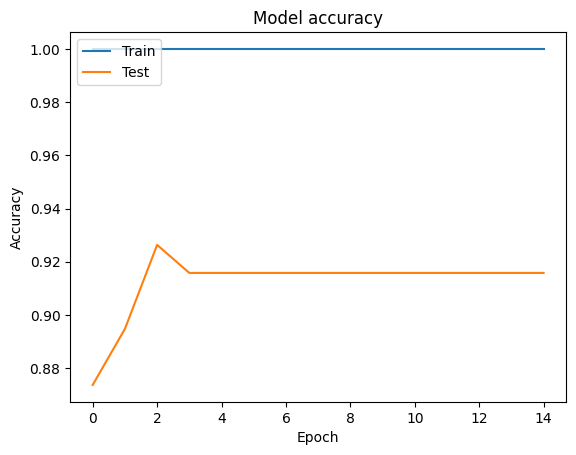

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
score = new_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23388147354125977
Test accuracy: 0.9368420839309692


In [ ]:
model.summary()
model.save('TrainedResNet50.h5')